In [5]:
#!pip install apt-get
#!pip install sqlite3
#!pip install sqlalchemy
#!pip install psycopg2

# Business Problem

A **Insurance All** é uma empresa que fornece seguro de saúde para seus clientes e o time de produtos está analisando a possibilidade de oferecer aos assegurados, um novo produto: Um seguro de automóveis.

Assim como o seguro de saúde, os clientes desse novo plano de seguro de automóveis precisam pagar um valor anualmente à Insurance All para obter um valor assegurado pela empresa, destinado aos custos de um eventual acidente ou dano ao veículo.

A Insurance All fez uma pesquisa com cerca de 380 mil clientes sobre o interesse em aderir a um novo produto de seguro de automóveis, no ano passado. Todos os clientes demonstraram interesse ou não em adquirir o seguro de automóvel e essas respostas ficaram salvas em um banco de dados junto com outros atributos dos clientes.

O time de produtos selecionou 127 mil novos clientes que não responderam a pesquisa para participar de uma campanha, no qual receberão a oferta do novo produto de seguro de automóveis. A oferta será feita pelo time de vendas através de ligações telefônicas.

Contudo, o time de vendas tem uma capacidade de realizar 20 mil ligações dentro do período da campanha.

Nesse contexto, você foi contratado como um consultor de Ciência de Dados para construir um modelo que prediz se o cliente estaria ou não interessado no seguro de automóvel. 

Com a sua solução, o time de vendas espera conseguir priorizar as pessoas com maior interesse no novo produto e assim, otimizar a campanha realizando apenas contatos aos clientes mais propensos a realizar a compra.

Como resultado da sua consultoria, você precisará entregar um relatório contendo algumas análises e respostas às seguintes perguntas:

1) Principais Insights sobre os atributos mais relevantes de clientes interessados em adquirir um seguro de automóvel.

2) Qual a porcentagem de clientes interessados em adquirir um seguro de automóvel, o time de vendas conseguirá contatar fazendo 20.000 ligações?

3) E se a capacidade do time de vendas aumentar para 40.000 ligações, qual a porcentagem de clientes interessados em adquirir um seguro de automóvel o time de vendas conseguirá contatar?

4) Quantas ligações o time de vendas precisa fazer para contatar 80% dos clientes interessados em adquirir um seguro de automóvel?

**Business Problem**

    1) Principais Insights sobre os atributos mais relevantes de clientes interessados em adquirir um seguro de automóvel.


**Final Product**
1. Principais insights dos atributos dos clientes

2. Formato da entrega
    Gráficos/Tabela
    
3. Local da entrega
    Telegram/PowerBI


**Process**
1. Passo a passo
    - Realizar feature engineering na base de dados (1º bd - 380K) dos clientes interessados e levantar as hipóteses para cada atributo a ser validada; 
    - No EDA validar as hipóteses e identificar insights dos clientes interessados;


2. Definir o formato da entrega (visualizaçao, tabela, frase)
    - Gráficos que melhor demonstrem as informaçoes.
    - Utilizar os seguintes parâmetros: Id | Gender | Age | Driving License | Region Code | Previously Insured | Vehicle Age | Vehicle Damage | Anual Premium | Policy sales channel | Vintage |
    - Definiçao do schema: colunas e seu tipo
    - Definição da infraestrutura de armazenamento (SQLITE3)
    - Design do ETL (Scripts de Extração, Transformação e Carga)
    - Planejamento de agendamento dos scripts (dependência entre os scripts)
    - Fazer as visualizações
    - Entrega do produto final


3. Decidir o local de entrega (powerBi, telegram, email, streamlit, intranet)
    - PowerBI, Telegram
    
    
**Enter**
1. Fonte de dados:
    - Site da Kaggle
    - BD na AWS

2. Ferramentas:
    - Pyhton 3.8.0
    - AWS
    - Pycharm
    - Jupyter Notebook (análises e prototipagens)
    - Crontjob, Airflow
    - Streamlit
    - PowerBI
    - Telegram

**Business Problem**

    2) Qual a porcentagem de clientes interessados em adquirir um seguro de automóvel, o time de vendas conseguirá contatar fazendo 20.000 ligações?
    3) E se a capacidade do time de vendas aumentar para 40.000 ligações, qual a porcentagem de clientes interessados em adquirir um seguro de automóvel o time de vendas conseguirá contatar?
    4) Quantas ligações o time de vendas precisa fazer para contatar 80% dos clientes interessados em adquirir um seguro de automóvel?


**Final Product**
1. Percentual de clientes interessados da base e se poderá atender o limite de 20K/40K ligaçoes

2. Formato da entrega
    Gráfico ou tabela
    
3. Local da entrega
    Telegram


**Process**
1. Passo a passo
    - Realizar análise da base de dados (2 bd 127 K) e aplicar modelos de ML para obter os atributos que definem
        o cliente com maior probabilidade de adquirir o seguro. Com essas características definir a quantidade 
        de clientes potenciais e se e possível atender com 20/40K ligaçoes.

2. Definir o formato da entrega (visualizaçao, tabela, frase)
    - Gráfico ou tabela

3. Decidir o local de entrega (powerBi, telegram, email, streamlit, intranet)
    - PowerBI, Telegram
    
    
**Enter**
1. Fonte de dados:
    - Site da Kaggle
    - BD na AWS

2. Ferramentas:
    - Pyhton 3.8.0
    - AWS
    - Pycharm
    - Jupyter Notebook (análises e prototipagens)
    - Crontjob, Airflow
    - Streamlit
    - PowerBI
    - Telegram

# Imports and credentials

In [79]:
import csv

import numpy             as np
import pandas            as pd
import seaborn           as sns
import psycopg2          as pg 
import pandas.io.sql     as psql
import matplotlib.pyplot as plt

from numpy               import cov
from scipy.stats         import pearsonr
from prettytable         import PrettyTable
from IPython.display     import Image

In [7]:
#credentials
host = 'comunidade-ds-postgres.c50pcakiuwi3.us-east-1.rds.amazonaws.com'
port  = 5432
database = 'comunidadedsdb'
user = 'member'
password = 'cdspa'

In [8]:
#connect
conn = pg.connect(host=host,
                 port=port,
                 database=database,
                 user=user,
                 password=password)

# 1.0 Schema Query

In [9]:
cursor = conn.cursor()

query_schema = """
    SELECT nspname
    FROM pg_catalog.pg_namespace

"""

cursor.execute(query_schema)

In [10]:
records = cursor.fetchall()
print(records)
#cursor.close()
#conn.close()

[('pg_toast',), ('pg_temp_1',), ('pg_toast_temp_1',), ('pg_catalog',), ('information_schema',), ('public',), ('pa004',), ('pg_temp_4',), ('pg_toast_temp_4',), ('pa005',), ('pg_temp_9',), ('pg_toast_temp_9',)]


# 2.0 Table Query

In [11]:
cursor = conn.cursor()

query_tables = """
    SELECT tablename
    FROM pg_tables
    WHERE schemaname = 'pa004'

"""

cursor.execute(query_tables)

In [12]:
records = cursor.fetchall()
print(records)
#cursor.close()
#conn.close()

[('users',), ('vehicle',), ('insurance',)]


# 3.0 Collect Data using Psycopg2

In [13]:
cursor = conn.cursor()

query_tables_users = """
    SELECT *
    FROM pa004.users u
    WHERE u.age >40
    limit 10

"""

cursor.execute(query_tables_users)

In [14]:
records = cursor.fetchall()
print(records)
#cursor.close()
#conn.close()

[(1, 'Male', 44, 28.0, 26.0), (2, 'Male', 76, 3.0, 26.0), (3, 'Male', 47, 28.0, 26.0), (8, 'Female', 56, 28.0, 26.0), (11, 'Female', 47, 35.0, 124.0), (13, 'Female', 41, 15.0, 14.0), (14, 'Male', 76, 28.0, 13.0), (15, 'Male', 71, 28.0, 30.0), (19, 'Male', 42, 28.0, 124.0), (20, 'Female', 60, 33.0, 124.0)]


In [15]:
data = pd.DataFrame(records)
data.head()

,0,1,2,3,4
0,1,Male,44,28.0,26.0
1,2,Male,76,3.0,26.0
2,3,Male,47,28.0,26.0
3,8,Female,56,28.0,26.0
4,11,Female,47,35.0,124.0


# 4.0 Collect using Pandas

In [16]:
query_tables_users = """
    SELECT *
    FROM pa004.users u
"""

df_users = psql.read_sql(query_tables_users,conn)
df_users.head()

,id,gender,age,region_code,policy_sales_channel
0,1,Male,44,28.0,26.0
1,2,Male,76,3.0,26.0
2,3,Male,47,28.0,26.0
3,4,Male,21,11.0,152.0
4,5,Female,29,41.0,152.0


In [17]:
query_tables_vehicle = """
    SELECT *
    FROM pa004.vehicle v
"""

df_vehicle = psql.read_sql(query_tables_vehicle,conn)
df_vehicle.head()

,id,driving_license,vehicle_age,vehicle_damage
0,1,1,> 2 Years,Yes
1,2,1,1-2 Year,No
2,3,1,> 2 Years,Yes
3,4,1,< 1 Year,No
4,5,1,< 1 Year,No


In [18]:
query_tables_insurance = """
    SELECT *
    FROM pa004.insurance i
"""

df_insurance = psql.read_sql(query_tables_insurance,conn)
df_insurance.head()

,id,previously_insured,annual_premium,vintage,response
0,1,0,40454.0,217,1
1,2,0,33536.0,183,0
2,3,0,38294.0,27,1
3,4,1,28619.0,203,0
4,5,1,27496.0,39,0


In [19]:
query_tables_all = """
    SELECT *
    FROM pa004.insurance i inner join pa004.vehicle v on (i.id = v.id)
                           inner join pa004.users u on (i.id = u.id)
"""

df = psql.read_sql(query_tables_all,conn)


In [20]:
df.to_csv('data.csv')

In [21]:
df = pd.read_csv('data.csv')
df = df.drop(['Unnamed: 0', 'id.1', 'id.2'], axis=1)

# 1.0. Data Description

In [22]:
df1 = df.copy()

## 1.1. Data Dimensions

In [23]:
print('Number of columns: ', df1.shape[1])
print('Number of rows: ', df1.shape[0])

Number of columns:  12
Number of rows:  381109


## 1.2. Data Types

In [24]:
df1.dtypes

id                        int64
previously_insured        int64
annual_premium          float64
vintage                   int64
response                  int64
driving_license           int64
vehicle_age              object
vehicle_damage           object
gender                   object
age                       int64
region_code             float64
policy_sales_channel    float64
dtype: object

## 1.3. Checking NA

In [25]:
df1.isna().sum()

id                      0
previously_insured      0
annual_premium          0
vintage                 0
response                0
driving_license         0
vehicle_age             0
vehicle_damage          0
gender                  0
age                     0
region_code             0
policy_sales_channel    0
dtype: int64

## 1.4. Unity Change

In [26]:
#annual_premium
df1['annual_premium'] = df1['annual_premium'].astype(int)

In [27]:
#region_code
df1['region_code'] = df1['region_code'].astype(int)

In [28]:
#policy_sales_channel
df1['policy_sales_channel'] = df1['policy_sales_channel'].astype(int)

In [29]:
#vehicle_damage
df1['vehicle_damage'] = df1['vehicle_damage'].apply(lambda x: 1 if x == 'Yes' else 0)

In [30]:
#gender
df1['gender'] = df1['gender'].apply(lambda x: 1 if x == 'Female' else 2)

In [31]:
#vehicle_age
df1['vehicle_age'] = df1['vehicle_age'].apply(lambda x: 1 if x == '< 1 Year' else x)
df1['vehicle_age'] = df1['vehicle_age'].apply(lambda x: 1.5 if x == '1-2 Year' else x)
df1['vehicle_age'] = df1['vehicle_age'].apply(lambda x: 2 if x == '> 2 Years' else x)

#transform to (int)
#df1['vehicle_age'] = pd.to_numeric(df1['vehicle_age'],errors = 'coerce')

In [32]:
df1

,id,previously_insured,annual_premium,vintage,response,driving_license,vehicle_age,vehicle_damage,gender,age,region_code,policy_sales_channel
0,7,0,23367,249,0,1,1.0,1,2,23,11,152
1,13,1,31409,221,0,1,1.5,0,1,41,15,14
2,18,1,46622,299,0,1,1.0,0,1,25,35,152
3,31,0,2630,136,0,1,1.0,0,1,26,8,160
4,39,0,42297,264,0,1,1.5,1,2,45,8,124
...,...,...,...,...,...,...,...,...,...,...,...,...
381104,381070,1,38254,127,0,1,1.0,0,2,24,8,152
381105,381079,0,39740,170,0,1,1.5,1,1,58,28,26
381106,381082,1,51619,80,0,1,1.5,0,1,75,28,26
381107,381097,0,34541,44,0,1,1.5,1,1,49,10,26


In [33]:
df1.dtypes

id                        int64
previously_insured        int64
annual_premium            int32
vintage                   int64
response                  int64
driving_license           int64
vehicle_age             float64
vehicle_damage            int64
gender                    int64
age                       int64
region_code               int32
policy_sales_channel      int32
dtype: object

## 1.5. Descriptive Statiscal

In [51]:
#central tendency - mean, median
ct1 = pd.DataFrame(df1.apply(np.mean)).T
ct2 = pd.DataFrame(df1.apply(np.median)).T

#Dispersion - std, min, max, range, skew, kurtosis
d1 = pd.DataFrame(df1.apply(min)).T
d2 = pd.DataFrame(df1.apply(max)).T
d3 = pd.DataFrame(df1.apply(lambda x: x.max() - x.min())).T
d4 = pd.DataFrame(df1.apply(np.std)).T
d5 = pd.DataFrame(df1.apply(lambda x: x.skew())).T
d6 = pd.DataFrame(df1.apply(lambda x: x.kurtosis())).T

#concatenate
m = pd.concat([d1,d2,d3,ct1,ct2,d4,d5,d6]).T.reset_index()
m.columns = ['attributes','min','max','range','mean','median','std','skew','kurtosis']
m

,attributes,min,max,range,mean,median,std,skew,kurtosis
0,id,1.0,381109.0,381108.0,190555.000000,190555.0,110016.691870,-8.071174e-18,-1.200000
1,previously_insured,0.0,1.0,1.0,0.458210,0.0,0.498251,1.677471e-01,-1.971871
2,annual_premium,2630.0,540165.0,537535.0,30564.389581,31669.0,17213.132474,1.766087e+00,34.004569
3,vintage,10.0,299.0,289.0,154.347397,154.0,83.671194,3.029517e-03,-1.200688
4,response,0.0,1.0,1.0,0.122563,0.0,0.327935,2.301906e+00,3.298788
5,driving_license,0.0,1.0,1.0,0.997869,1.0,0.046109,-2.159518e+01,464.354302
6,vehicle_age,1.0,2.0,1.0,1.304808,1.5,0.283719,2.528959e-01,-0.792253
7,vehicle_damage,0.0,1.0,1.0,0.504877,1.0,0.499976,-1.950724e-02,-1.999630
8,gender,1.0,2.0,1.0,1.540761,2.0,0.498336,-1.635904e-01,-1.973249
9,age,20.0,85.0,65.0,38.822584,36.0,15.511591,6.725390e-01,-0.565655


# 2.0. Feature Engineering

In [35]:
df2 = df1.copy()

## 2.1 Mind Map

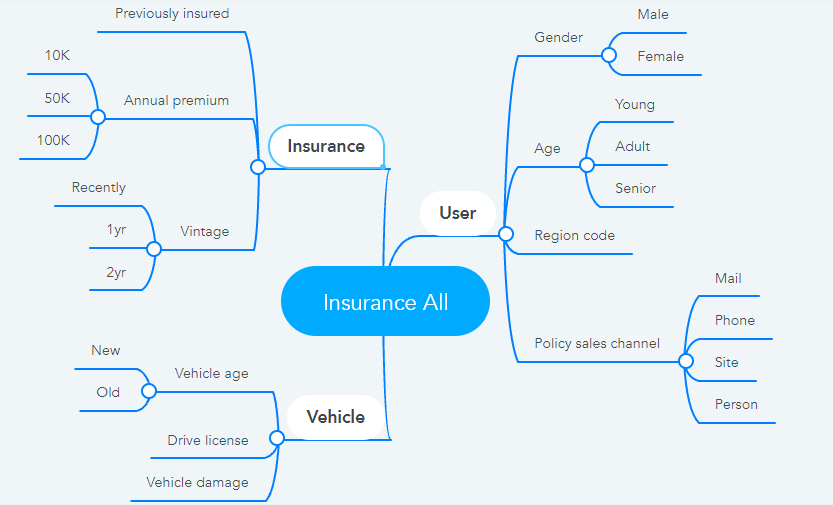

In [41]:
Image('C:/Users/Henrique/repos/Insurance All/mindmap.png')

In [42]:
# Specify the Column Names while initializing the Table 
myTable = PrettyTable(['Category','Name', 'Code', 'Unity']) 

myTable.align["Name"] = "l"

# Add rows 
myTable.add_row(['User', 'Age', 'age', 'int (days)']) 
myTable.add_row(['User', 'Gender', 'gender', 'int - 1 (women) 2 (men)']) 
myTable.add_row(['User', 'Region code', 'region_code', 'int'])
myTable.add_row(['User', 'Policy sales channel', 'policy_sales_channel', 'int'])
myTable.add_row(['', '', '', ''])
myTable.add_row(['Vehicle','Vehicle age','vehicle_age', 'float'])
myTable.add_row(['Vehicle','Drive license','drive_license', 'int - 0 (no) 1 (yes)'])
myTable.add_row(['Vehicle','Vehicle damage','vehicle_damage', 'int - 0 (no) 1 (yes)'])
myTable.add_row(['', '', '', ''])
myTable.add_row(['Insurance','Previously insured','previously_insured', 'int - 0 (no) 1 (yes)'])
myTable.add_row(['Insurance','Annual premium','annual_premium', 'int'])
myTable.add_row(['Insurance','Vintage','vintage', 'int'])

print(myTable)

+-----------+----------------------+----------------------+-------------------------+
|  Category | Name                 |         Code         |          Unity          |
+-----------+----------------------+----------------------+-------------------------+
|    User   | Age                  |         age          |        int (days)       |
|    User   | Gender               |        gender        | int - 1 (women) 2 (men) |
|    User   | Region code          |     region_code      |           int           |
|    User   | Policy sales channel | policy_sales_channel |           int           |
|           |                      |                      |                         |
|  Vehicle  | Vehicle age          |     vehicle_age      |          float          |
|  Vehicle  | Drive license        |    drive_license     |   int - 0 (no) 1 (yes)  |
|  Vehicle  | Vehicle damage       |    vehicle_damage    |   int - 0 (no) 1 (yes)  |
|           |                      |                  

## 2.2 Hypothesis Creation

### 2.2.1 User Hypothesis

**1.** People older than 30 years old are more susceptible to have an insurance

**2.** Women hire more insurances

### 2.2.2 Vehicle Hypothesis

**3.** Owners with new cars hire more insurances

**4.** People with drive license hire more insurances

**5.** Owners with vehicle damaged dont hire insurances

### 2.2.3 Insurance Hypothesis

**6.** People previously insured hire another insurance

**7.** Higher annual premium more insurances get

**8.** More days with company more insurances get

# 3.0 Data Selecting

In [68]:
df3 = df2.copy()

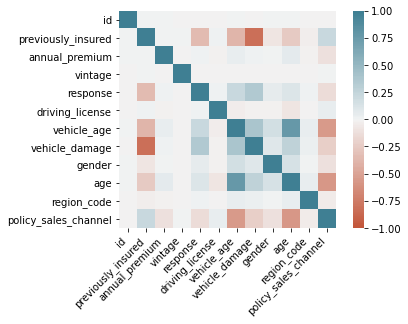

In [69]:
corr = df3.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [70]:
covariance = cov(df3['vehicle_damage'], df3['previously_insured'])
print(covariance)

[[ 0.24997688 -0.20530554]
 [-0.20530554  0.24825426]]


In [71]:
covariance = cov(df3['age'], df3['vehicle_age'])
print(covariance)

[[2.40610076e+02 3.37020367e+00]
 [3.37020367e+00 8.04968687e-02]]


In [72]:
corr, _ = pearsonr(df3['vehicle_damage'], df3['previously_insured'])
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: -0.824


In [73]:
corr, _ = pearsonr(df3['age'], df3['vehicle_age'])
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.766


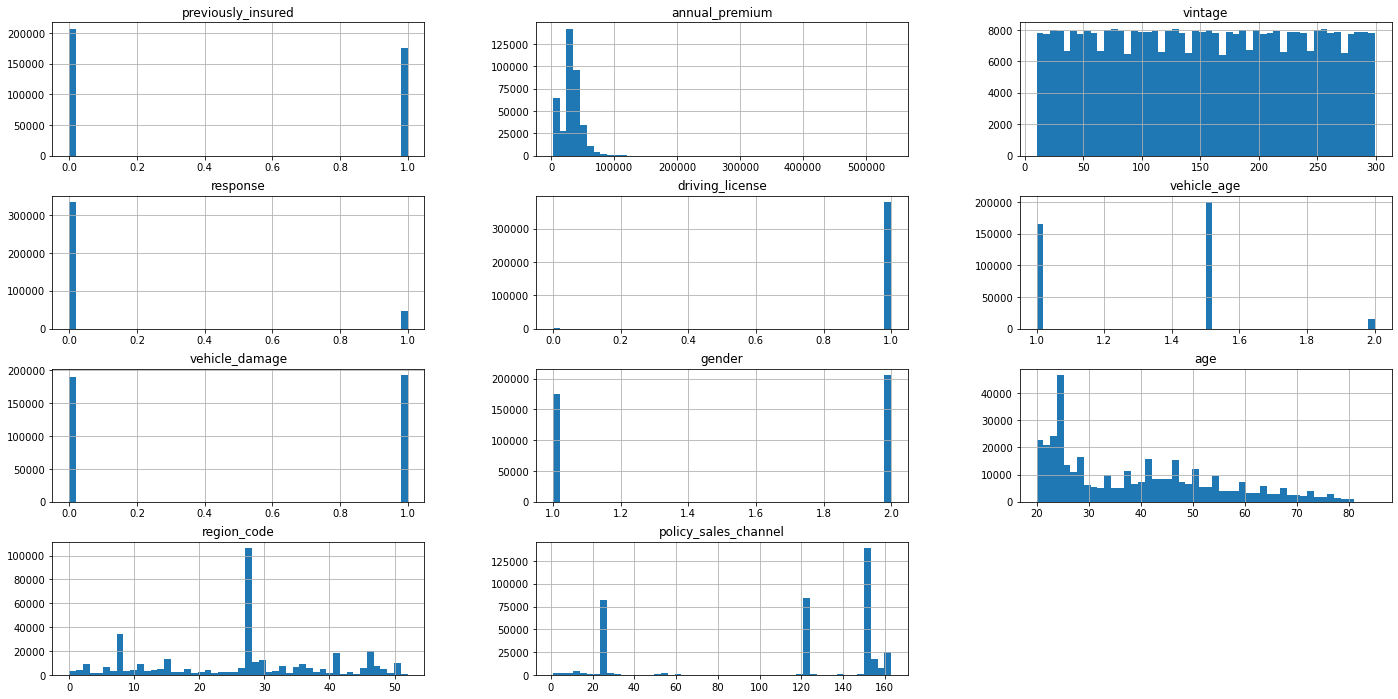

In [74]:
df32 = df3.drop('id', axis=1)
df32.hist(figsize=(24,12), bins=50);

## 3.1. Identifying Outliers

C:\Users\Henrique\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


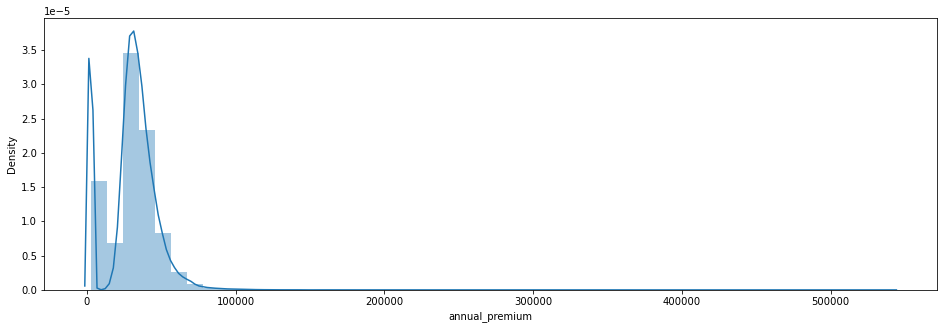

In [80]:
#histogram
plt.figure(figsize=(16,5))
plt.subplot(1,1,1)
sns.distplot(df3['annual_premium'])
#plt.subplot(1,2,2)
#sns.distplot(df['placement_exam_marks'])
plt.show()

In [81]:
print("Highest allowed",df3['annual_premium'].mean() + 3*df3['annual_premium'].std())
print("Lowest allowed",df3['annual_premium'].mean() - 3*df3['annual_premium'].std())

Highest allowed 82203.8547523599
Lowest allowed -21075.07558944325


In [62]:
#central tendency - mean, median
ct1 = pd.DataFrame(df3.apply(np.mean)).T
ct2 = pd.DataFrame(df3.apply(np.median)).T

#Dispersion - std, min, max, range, skew, kurtosis
d1 = pd.DataFrame(df3.apply(min)).T
d2 = pd.DataFrame(df3.apply(max)).T
d3 = pd.DataFrame(df3.apply(lambda x: x.max() - x.min())).T
d4 = pd.DataFrame(df3.apply(np.std)).T
d5 = pd.DataFrame(df3.apply(lambda x: x.skew())).T
d6 = pd.DataFrame(df3.apply(lambda x: x.kurtosis())).T

#concatenate
m = pd.concat([d1,d2,d3,ct1,ct2,d4,d5,d6]).T.reset_index()
m.columns = ['attributes','min','max','range','mean','median','std','skew','kurtosis']
m

,attributes,min,max,range,mean,median,std,skew,kurtosis
0,id,1.0,381109.0,381108.0,190529.032642,190515.5,110023.570032,0.000381,-1.200069
1,previously_insured,0.0,1.0,1.0,0.458293,0.0,0.498257,0.167412,-1.971984
2,annual_premium,2630.0,82202.0,79572.0,30122.633666,31594.0,15695.672176,-0.221180,0.027440
3,vintage,10.0,299.0,289.0,154.351290,154.0,83.669858,0.002957,-1.200690
4,response,0.0,1.0,1.0,0.122387,0.0,0.327733,2.304403,3.310291
5,driving_license,0.0,1.0,1.0,0.997879,1.0,0.046008,-21.643272,466.433668
6,vehicle_age,1.0,2.0,1.0,1.304519,1.5,0.283630,0.253171,-0.793892
7,vehicle_damage,0.0,1.0,1.0,0.504704,1.0,0.499978,-0.018818,-1.999656
8,gender,1.0,2.0,1.0,1.540636,2.0,0.498346,-0.163083,-1.973414
9,age,20.0,85.0,65.0,38.798666,36.0,15.498723,0.674081,-0.562105


In [66]:
a= df1.shape[0] - df3.shape[0]
a

2083